In [119]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model


In [120]:
df = pd.read_csv("C:/Users/sflan/Dropbox (Brown)/Healthfully/Clean Data/weather_flu_google_9.csv")

In [121]:
df.head()
# list(df)
df['cases'] = df['total.specimens']*df['percent.positive']*1/10000 # cases in hundreds
list(df)

['year',
 'week',
 'total.specimens',
 'percent.positive',
 'cough_medicine',
 'flu_clinic',
 'flu_shot',
 'flu_vaccine',
 'flu',
 'influenza',
 'oseltamivir',
 'relenza',
 'tamiflu',
 'zanamivir',
 'flu_symptoms',
 'median_tmax',
 'median_tmin',
 'median_t',
 'total_prcp',
 'humidity',
 'vac_num',
 'vac_effectiveness',
 'all_rate',
 'rate_0_4',
 'rate_5_17',
 'rate_18_49',
 'rate_50_64',
 'rate_65_plus',
 'celcius_median_t',
 'absolute_humidity',
 'cases']

In [122]:
df.shape

(418, 31)

In [123]:
x = df[['year', 'week', 'cough_medicine', 'flu_clinic',
        'flu_shot', 'flu_vaccine', 'flu', 'influenza', 'tamiflu', 'celcius_median_t', 'vac_num',
        'vac_effectiveness', 'absolute_humidity']]
x.head()

,year,week,cough_medicine,flu_clinic,flu_shot,flu_vaccine,flu,influenza,tamiflu,celcius_median_t,vac_num,vac_effectiveness,absolute_humidity
0,2010,40,55.12500,120.718085,85.207101,44.615385,17.790698,35.0,3.333333,13.611111,130.9,60,9.417646
1,2010,41,55.12500,165.691489,47.928994,55.384615,20.755814,29.0,3.333333,12.222222,130.9,60,7.021040
2,2010,42,81.15625,80.478723,76.331361,32.307692,16.802326,14.0,2.000000,10.277778,130.9,60,5.831757
3,2010,43,53.59375,89.000000,53.254438,64.615385,14.825581,14.0,2.000000,15.555556,130.9,60,8.617508
4,2010,44,49.00000,78.111702,37.278107,63.076923,14.825581,28.0,3.333333,6.666667,130.9,60,5.231198


In [124]:
# y = df[['cases']]
y = df.cases
y.head()
print(type(y))

<class 'pandas.core.series.Series'>


In [125]:
k_range = list(range(1, 31))
print("\t", k_range)

	 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [126]:
param_grid = dict(n_neighbors=k_range)
print("  ", param_grid)

   {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [127]:
# knr = KNeighborsRegressor()
# grid = GridSearchCV(knr, param_grid, cv=10, scoring='accuracy', return_train_score=False, n_jobs=-1)
# grid.fit(x,y)
# pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
C:\Users\sflan\Anaconda3\lib\runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
C:\Users\sflan\Anaconda3\lib\runpy.py in _run_code(code=<code object <module> at 0x00000298832E4ED0, fil...lib\site-packages\ipykernel_launcher.py", line 5>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\Users\sflan\Anaconda3\lib\site-packages\__pycache__\ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\Users\sflan\Anaconda3\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\Users\\s...a3\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x00000298832E4ED0, fil...lib\site-packages\ipykernel_launcher.py", line 5>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\Users\sflan\Anaconda3\lib\site-packages\__pycache__\ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\Users\sflan\Anaconda3\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\Users\\s...a3\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
C:\Users\sflan\Anaconda3\lib\site-packages\ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
C:\Users\sflan\Anaconda3\lib\site-packages\traitlets\config\application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
C:\Users\sflan\Anaconda3\lib\site-packages\ipykernel\kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    481         if self.poller is not None:
    482             self.poller.start()
    483         self.kernel.start()
    484         self.io_loop = ioloop.IOLoop.current()
    485         try:
--> 486             self.io_loop.start()
        self.io_loop.start = <bound method BaseAsyncIOLoop.start of <tornado.platform.asyncio.AsyncIOMainLoop object>>
    487         except KeyboardInterrupt:
    488             pass
    489 
    490 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
C:\Users\sflan\Anaconda3\lib\site-packages\tornado\platform\asyncio.py in start(self=<tornado.platform.asyncio.AsyncIOMainLoop object>)
    122         except (RuntimeError, AssertionError):
    123             old_loop = None
    124         try:
    125             self._setup_logging()
    126             asyncio.set_event_loop(self.asyncio_loop)
--> 127             self.asyncio_loop.run_forever()
        self.asyncio_loop.run_forever = <bound method BaseEventLoop.run_forever of <_Win...EventLoop running=True closed=False debug=False>>
    128         finally:
    129             asyncio.set_event_loop(old_loop)
    130 
    131     def stop(self):

...........................................................................
C:\Users\sflan\Anaconda3\lib\asyncio\base_events.py in run_forever(self=<_WindowsSelectorEventLoop running=True closed=False debug=False>)
    417             sys.set_asyncgen_hooks(firstiter=self._asyncgen_firstiter_hook,
    418                                    finalizer=self._asyncgen_finalizer_hook)
    419         try:
    420             events._set_running_loop(self)
    421             while True:
--> 422                 self._run_once()
        self._run_once = <bound method BaseEventLoop._run_once of <_Windo...EventLoop running=True closed=False debug=False>>
    423                 if self._stopping:
    424                     break
    425         finally:
    426             self._stopping = False

...........................................................................
C:\Users\sflan\Anaconda3\lib\asyncio\base_events.py in _run_once(self=<_WindowsSelectorEventLoop running=True closed=False debug=False>)
   1427                         logger.warning('Executing %s took %.3f seconds',
   1428                                        _format_handle(handle), dt)
   1429                 finally:
   1430                     self._current_handle = None
   1431             else:
-> 1432                 handle._run()
        handle._run = <bound method Handle._run of <Handle IOLoop._run_callback(functools.par...02988AA2CA60>))>>
   1433         handle = None  # Needed to break cycles when an exception occurs.
   1434 
   1435     def _set_coroutine_wrapper(self, enabled):
   1436         try:

...........................................................................
C:\Users\sflan\Anaconda3\lib\asyncio\events.py in _run(self=<Handle IOLoop._run_callback(functools.par...02988AA2CA60>))>)
    140             self._callback = None
    141             self._args = None
    142 
    143     def _run(self):
    144         try:
--> 145             self._callback(*self._args)
        self._callback = <bound method IOLoop._run_callback of <tornado.platform.asyncio.AsyncIOMainLoop object>>
        self._args = (functools.partial(<function wrap.<locals>.null_wrapper at 0x000002988AA2CA60>),)
    146         except Exception as exc:
    147             cb = _format_callback_source(self._callback, self._args)
    148             msg = 'Exception in callback {}'.format(cb)
    149             context = {

...........................................................................
C:\Users\sflan\Anaconda3\lib\site-packages\tornado\ioloop.py in _run_callback(self=<tornado.platform.asyncio.AsyncIOMainLoop object>, callback=functools.partial(<function wrap.<locals>.null_wrapper at 0x000002988AA2CA60>))
    754         """Runs a callback with error handling.
    755 
    756         For use in subclasses.
    757         """
    758         try:
--> 759             ret = callback()
        ret = undefined
        callback = functools.partial(<function wrap.<locals>.null_wrapper at 0x000002988AA2CA60>)
    760             if ret is not None:
    761                 from tornado import gen
    762                 # Functions that return Futures typically swallow all
    763                 # exceptions and store them in the Future.  If a Future

...........................................................................
C:\Users\sflan\Anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=(), **kwargs={})
    271         # Fast path when there are no active contexts.
    272         def null_wrapper(*args, **kwargs):
    273             try:
    274                 current_state = _state.contexts
    275                 _state.contexts = cap_contexts[0]
--> 276                 return fn(*args, **kwargs)
        args = ()
        kwargs = {}
    277             finally:
    278                 _state.contexts = current_state
    279         null_wrapper._wrapped = True
    280         return null_wrapper

...........................................................................
C:\Users\sflan\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in <lambda>()
    531             return
    532 
    533         if state & self.socket.events:
    534             # events still exist that haven't been processed
    535             # explicitly schedule handling to avoid missing events due to edge-triggered FDs
--> 536             self.io_loop.add_callback(lambda : self._handle_events(self.socket, 0))
    537 
    538     def _init_io_state(self):
    539         """initialize the ioloop event handler"""
    540         with stack_context.NullContext():

...........................................................................
C:\Users\sflan\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=0)
    445             return
    446         zmq_events = self.socket.EVENTS
    447         try:
    448             # dispatch events:
    449             if zmq_events & zmq.POLLIN and self.receiving():
--> 450                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    451                 if not self.socket:
    452                     return
    453             if zmq_events & zmq.POLLOUT and self.sending():
    454                 self._handle_send()

...........................................................................
C:\Users\sflan\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    475             else:
    476                 raise
    477         else:
    478             if self._recv_callback:
    479                 callback = self._recv_callback
--> 480                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    481         
    482 
    483     def _handle_send(self):
    484         """Handle a send event."""

...........................................................................
C:\Users\sflan\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    427         close our socket."""
    428         try:
    429             # Use a NullContext to ensure that all StackContexts are run
    430             # inside our blanket exception handler rather than outside.
    431             with stack_context.NullContext():
--> 432                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    433         except:
    434             gen_log.error("Uncaught exception in ZMQStream callback",
    435                           exc_info=True)
    436             # Re-raise the exception so that IOLoop.handle_callback_exception

...........................................................................
C:\Users\sflan\Anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    271         # Fast path when there are no active contexts.
    272         def null_wrapper(*args, **kwargs):
    273             try:
    274                 current_state = _state.contexts
    275                 _state.contexts = cap_contexts[0]
--> 276                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    277             finally:
    278                 _state.contexts = current_state
    279         null_wrapper._wrapped = True
    280         return null_wrapper

...........................................................................
C:\Users\sflan\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
C:\Users\sflan\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': "knr = KNeighborsRegressor()\ngrid = GridSearchCV(...[['mean_test_score', 'std_test_score', 'params']]", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 11, 3, 18, 17, 46, 213849, tzinfo=tzutc()), 'msg_id': '378a7e3ce64e4e6e85a35380e20c8169', 'msg_type': 'execute_request', 'session': 'ee64923933fc42ea980b0875dea3d6f6', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '378a7e3ce64e4e6e85a35380e20c8169', 'msg_type': 'execute_request', 'parent_header': {}})
    228             self.log.warn("Unknown message type: %r", msg_type)
    229         else:
    230             self.log.debug("%s: %s", msg_type, msg)
    231             self.pre_handler_hook()
    232             try:
--> 233                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'ee64923933fc42ea980b0875dea3d6f6']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': "knr = KNeighborsRegressor()\ngrid = GridSearchCV(...[['mean_test_score', 'std_test_score', 'params']]", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 11, 3, 18, 17, 46, 213849, tzinfo=tzutc()), 'msg_id': '378a7e3ce64e4e6e85a35380e20c8169', 'msg_type': 'execute_request', 'session': 'ee64923933fc42ea980b0875dea3d6f6', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '378a7e3ce64e4e6e85a35380e20c8169', 'msg_type': 'execute_request', 'parent_header': {}}
    234             except Exception:
    235                 self.log.error("Exception in message handler:", exc_info=True)
    236             finally:
    237                 self.post_handler_hook()

...........................................................................
C:\Users\sflan\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'ee64923933fc42ea980b0875dea3d6f6'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': "knr = KNeighborsRegressor()\ngrid = GridSearchCV(...[['mean_test_score', 'std_test_score', 'params']]", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 11, 3, 18, 17, 46, 213849, tzinfo=tzutc()), 'msg_id': '378a7e3ce64e4e6e85a35380e20c8169', 'msg_type': 'execute_request', 'session': 'ee64923933fc42ea980b0875dea3d6f6', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '378a7e3ce64e4e6e85a35380e20c8169', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
C:\Users\sflan\Anaconda3\lib\site-packages\ipykernel\ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code="knr = KNeighborsRegressor()\ngrid = GridSearchCV(...[['mean_test_score', 'std_test_score', 'params']]", silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    203 
    204         self._forward_input(allow_stdin)
    205 
    206         reply_content = {}
    207         try:
--> 208             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = "knr = KNeighborsRegressor()\ngrid = GridSearchCV(...[['mean_test_score', 'std_test_score', 'params']]"
        store_history = True
        silent = False
    209         finally:
    210             self._restore_input()
    211 
    212         if res.error_before_exec is not None:

...........................................................................
C:\Users\sflan\Anaconda3\lib\site-packages\ipykernel\zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=("knr = KNeighborsRegressor()\ngrid = GridSearchCV(...[['mean_test_score', 'std_test_score', 'params']]",), **kwargs={'silent': False, 'store_history': True})
    532             )
    533         self.payload_manager.write_payload(payload)
    534 
    535     def run_cell(self, *args, **kwargs):
    536         self._last_traceback = None
--> 537         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ("knr = KNeighborsRegressor()\ngrid = GridSearchCV(...[['mean_test_score', 'std_test_score', 'params']]",)
        kwargs = {'silent': False, 'store_history': True}
    538 
    539     def _showtraceback(self, etype, evalue, stb):
    540         # try to preserve ordering of tracebacks and print statements
    541         sys.stdout.flush()

...........................................................................
C:\Users\sflan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell="knr = KNeighborsRegressor()\ngrid = GridSearchCV(...[['mean_test_score', 'std_test_score', 'params']]", store_history=True, silent=False, shell_futures=True)
   2657         -------
   2658         result : :class:`ExecutionResult`
   2659         """
   2660         try:
   2661             result = self._run_cell(
-> 2662                 raw_cell, store_history, silent, shell_futures)
        raw_cell = "knr = KNeighborsRegressor()\ngrid = GridSearchCV(...[['mean_test_score', 'std_test_score', 'params']]"
        store_history = True
        silent = False
        shell_futures = True
   2663         finally:
   2664             self.events.trigger('post_execute')
   2665             if not silent:
   2666                 self.events.trigger('post_run_cell', result)

...........................................................................
C:\Users\sflan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in _run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell="knr = KNeighborsRegressor()\ngrid = GridSearchCV(...[['mean_test_score', 'std_test_score', 'params']]", store_history=True, silent=False, shell_futures=True)
   2780                 self.displayhook.exec_result = result
   2781 
   2782                 # Execute the user code
   2783                 interactivity = 'none' if silent else self.ast_node_interactivity
   2784                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2785                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2786                 
   2787                 self.last_execution_succeeded = not has_raised
   2788                 self.last_execution_result = result
   2789 

...........................................................................
C:\Users\sflan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Assign object>, <_ast.Assign object>, <_ast.Expr object>, <_ast.Expr object>], cell_name='<ipython-input-127-773f8a7594eb>', interactivity='last', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 298894f7d68, executio...rue silent=False shell_futures=True> result=None>)
   2898 
   2899         try:
   2900             for i, node in enumerate(to_run_exec):
   2901                 mod = ast.Module([node])
   2902                 code = compiler(mod, cell_name, "exec")
-> 2903                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x0000029889470540, file "<ipython-input-127-773f8a7594eb>", line 3>
        result = <ExecutionResult object at 298894f7d68, executio...rue silent=False shell_futures=True> result=None>
   2904                     return True
   2905 
   2906             for i, node in enumerate(to_run_interactive):
   2907                 mod = ast.Interactive([node])

...........................................................................
C:\Users\sflan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x0000029889470540, file "<ipython-input-127-773f8a7594eb>", line 3>, result=<ExecutionResult object at 298894f7d68, executio...rue silent=False shell_futures=True> result=None>)
   2958         outflag = True  # happens in more places, so it's easier as default
   2959         try:
   2960             try:
   2961                 self.hooks.pre_run_code_hook()
   2962                 #rprint('Running code', repr(code_obj)) # dbg
-> 2963                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x0000029889470540, file "<ipython-input-127-773f8a7594eb>", line 3>
        self.user_global_ns = {'GaussianNB': <class 'sklearn.naive_bayes.GaussianNB'>, 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', 'import pandas as pd', 'df = pd.read_csv("C:/Users/sflan/Dropbox (Brown)/Healthfully/Clean Data/weather_flu_google_9.csv")', 'df.head()', 'df.head()\ndf.names()', 'df.head()\ndf.colnames()', 'df.head()\ndf.cols()', 'df.head()\nlist(df)', "X = df[['year', 'week', 'total.specimens', 'perc...       'vac_effectiveness', 'absolute_humidity']]", "df.head()\nlist(df)\ndf['cases'] = df['total.specimens']*df['percent.positive']\nlist(df)", "X = df[['year', 'week', 'cases', 'cough_medicine...ac_effectiveness', 'absolute_humidity']]\nX.head()", "x = df[['year', 'week', 'cough_medicine', 'flu_c...ac_effectiveness', 'absolute_humidity']]\nx.head()", "y = df[['cases']]\ny.head()", 'import pandas as pd\nfrom sklearn.model_selection...\nfrom sklearn.model_selection import GridSearchCV', 'k_range = list(range(1, 31))\nprint("\\t", k_range)', 'param_grid = dict(n_neighbors=k_range)\nprint("  ", param_grid)', "grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False, n_jobs=-1)", "knn = KNeighborsClassifier()\ngrid = GridSearchCV...='accuracy', return_train_score=False, n_jobs=-1)", "knn = KNeighborsClassifier()\ngrid = GridSearchCV...[['mean_test_score', 'std_test_score', 'params']]", "knn = KNeighborsClassifier()\ngrid = GridSearchCV...[['mean_test_score', 'std_test_score', 'params']]", ...], 'KFold': <class 'sklearn.model_selection._split.KFold'>, 'KNeighborsClassifier': <class 'sklearn.neighbors.classification.KNeighborsClassifier'>, 'KNeighborsRegressor': <class 'sklearn.neighbors.regression.KNeighborsRegressor'>, 'LinearRegression': <class 'sklearn.linear_model.base.LinearRegression'>, 'LogisticRegression': <class 'sklearn.linear_model.logistic.LogisticRegression'>, 'Out': {3:    year  week  total.specimens  percent.positive...66667           5.231198  

[5 rows x 30 columns], 7: ['year', 'week', 'total.specimens', 'percent.positive', 'cough_medicine', 'flu_clinic', 'flu_shot', 'flu_vaccine', 'flu', 'influenza', 'oseltamivir', 'relenza', 'tamiflu', 'zanamivir', 'flu_symptoms', 'median_tmax', 'median_tmin', 'median_t', 'total_prcp', 'humidity', ...], 9: ['year', 'week', 'total.specimens', 'percent.positive', 'cough_medicine', 'flu_clinic', 'flu_shot', 'flu_vaccine', 'flu', 'influenza', 'oseltamivir', 'relenza', 'tamiflu', 'zanamivir', 'flu_symptoms', 'median_tmax', 'median_tmin', 'median_t', 'total_prcp', 'humidity', ...], 10:    year  week   cases  cough_medicine  flu_clini...17508  
4                 60           5.231198  , 11:    year  week  cough_medicine  flu_clinic   flu_...7  
3           8.617508  
4           5.231198  , 12:     cases
0    0.00
1   99.75
2  100.11
3  200.20
4    0.00, 30: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False), 32: 0.8112777850520604, 34: (418, 31), 36: 0.8112777850520604, ...}, 'X':      year  week     cases  cough_medicine  flu_c... 40          10.987722  

[418 rows x 14 columns], ...}
        self.user_ns = {'GaussianNB': <class 'sklearn.naive_bayes.GaussianNB'>, 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', 'import pandas as pd', 'df = pd.read_csv("C:/Users/sflan/Dropbox (Brown)/Healthfully/Clean Data/weather_flu_google_9.csv")', 'df.head()', 'df.head()\ndf.names()', 'df.head()\ndf.colnames()', 'df.head()\ndf.cols()', 'df.head()\nlist(df)', "X = df[['year', 'week', 'total.specimens', 'perc...       'vac_effectiveness', 'absolute_humidity']]", "df.head()\nlist(df)\ndf['cases'] = df['total.specimens']*df['percent.positive']\nlist(df)", "X = df[['year', 'week', 'cases', 'cough_medicine...ac_effectiveness', 'absolute_humidity']]\nX.head()", "x = df[['year', 'week', 'cough_medicine', 'flu_c...ac_effectiveness', 'absolute_humidity']]\nx.head()", "y = df[['cases']]\ny.head()", 'import pandas as pd\nfrom sklearn.model_selection...\nfrom sklearn.model_selection import GridSearchCV', 'k_range = list(range(1, 31))\nprint("\\t", k_range)', 'param_grid = dict(n_neighbors=k_range)\nprint("  ", param_grid)', "grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False, n_jobs=-1)", "knn = KNeighborsClassifier()\ngrid = GridSearchCV...='accuracy', return_train_score=False, n_jobs=-1)", "knn = KNeighborsClassifier()\ngrid = GridSearchCV...[['mean_test_score', 'std_test_score', 'params']]", "knn = KNeighborsClassifier()\ngrid = GridSearchCV...[['mean_test_score', 'std_test_score', 'params']]", ...], 'KFold': <class 'sklearn.model_selection._split.KFold'>, 'KNeighborsClassifier': <class 'sklearn.neighbors.classification.KNeighborsClassifier'>, 'KNeighborsRegressor': <class 'sklearn.neighbors.regression.KNeighborsRegressor'>, 'LinearRegression': <class 'sklearn.linear_model.base.LinearRegression'>, 'LogisticRegression': <class 'sklearn.linear_model.logistic.LogisticRegression'>, 'Out': {3:    year  week  total.specimens  percent.positive...66667           5.231198  

[5 rows x 30 columns], 7: ['year', 'week', 'total.specimens', 'percent.positive', 'cough_medicine', 'flu_clinic', 'flu_shot', 'flu_vaccine', 'flu', 'influenza', 'oseltamivir', 'relenza', 'tamiflu', 'zanamivir', 'flu_symptoms', 'median_tmax', 'median_tmin', 'median_t', 'total_prcp', 'humidity', ...], 9: ['year', 'week', 'total.specimens', 'percent.positive', 'cough_medicine', 'flu_clinic', 'flu_shot', 'flu_vaccine', 'flu', 'influenza', 'oseltamivir', 'relenza', 'tamiflu', 'zanamivir', 'flu_symptoms', 'median_tmax', 'median_tmin', 'median_t', 'total_prcp', 'humidity', ...], 10:    year  week   cases  cough_medicine  flu_clini...17508  
4                 60           5.231198  , 11:    year  week  cough_medicine  flu_clinic   flu_...7  
3           8.617508  
4           5.231198  , 12:     cases
0    0.00
1   99.75
2  100.11
3  200.20
4    0.00, 30: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False), 32: 0.8112777850520604, 34: (418, 31), 36: 0.8112777850520604, ...}, 'X':      year  week     cases  cough_medicine  flu_c... 40          10.987722  

[418 rows x 14 columns], ...}
   2964             finally:
   2965                 # Reset our crash handler in place
   2966                 sys.excepthook = old_excepthook
   2967         except SystemExit as e:

...........................................................................
C:\Users\sflan\Dropbox (Brown)\Data Science\DATA1030\<ipython-input-127-773f8a7594eb> in <module>()
      1 knr = KNeighborsRegressor()
      2 grid = GridSearchCV(knr, param_grid, cv=10, scoring='accuracy', return_train_score=False, n_jobs=-1)
----> 3 grid.fit(x,y)
      4 pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

...........................................................................
C:\Users\sflan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py in fit(self=GridSearchCV(cv=10, error_score='raise',
       ...core=False,
       scoring='accuracy', verbose=0), X=     year  week  cough_medicine  flu_clinic   fl... 40          10.987722  

[418 rows x 13 columns], y=0      0.000000
1      0.009975
2      0.010011
...0.039832
Name: cases, Length: 418, dtype: float64, groups=None, **fit_params={})
    634                                   return_train_score=self.return_train_score,
    635                                   return_n_test_samples=True,
    636                                   return_times=True, return_parameters=False,
    637                                   error_score=self.error_score)
    638           for parameters, (train, test) in product(candidate_params,
--> 639                                                    cv.split(X, y, groups)))
        cv.split = <bound method _BaseKFold.split of KFold(n_splits=10, random_state=None, shuffle=False)>
        X =      year  week  cough_medicine  flu_clinic   fl... 40          10.987722  

[418 rows x 13 columns]
        y = 0      0.000000
1      0.009975
2      0.010011
...0.039832
Name: cases, Length: 418, dtype: float64
        groups = None
    640 
    641         # if one choose to see train score, "out" will contain train score info
    642         if self.return_train_score:
    643             (train_score_dicts, test_score_dicts, test_sample_counts, fit_time,

...........................................................................
C:\Users\sflan\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object BaseSearchCV.fit.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Sat Nov  3 14:17:48 2018
PID: 8004                 Python 3.6.5: C:\Users\sflan\Anaconda3\python.exe
...........................................................................
C:\Users\sflan\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_score>, (KNeighborsRegressor(algorithm='auto', leaf_size=... n_neighbors=1, p=2,
          weights='uniform'),      year  week  cough_medicine        ...      ...   40          10.987722

[418 rows x 13 columns], 0      0.000000
1      0.009975
2      0.010011
...0.039832
Name: cases, Length: 418, dtype: float64, {'score': make_scorer(accuracy_score)}, array([ 42,  43,  44,  45,  46,  47,  48,  49,  ...08, 409, 410, 411, 412, 413, 414, 415, 416, 417]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 1..., 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41]), 0, {'n_neighbors': 1}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': False})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\Users\sflan\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (KNeighborsRegressor(algorithm='auto', leaf_size=... n_neighbors=1, p=2,
          weights='uniform'),      year  week  cough_medicine        ...      ...   40          10.987722

[418 rows x 13 columns], 0      0.000000
1      0.009975
2      0.010011
...0.039832
Name: cases, Length: 418, dtype: float64, {'score': make_scorer(accuracy_score)}, array([ 42,  43,  44,  45,  46,  47,  48,  49,  ...08, 409, 410, 411, 412, 413, 414, 415, 416, 417]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 1..., 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41]), 0, {'n_neighbors': 1})
        kwargs = {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': False}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\Users\sflan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py in _fit_and_score(estimator=KNeighborsRegressor(algorithm='auto', leaf_size=... n_neighbors=1, p=2,
          weights='uniform'), X=     year  week  cough_medicine        ...      ...   40          10.987722

[418 rows x 13 columns], y=0      0.000000
1      0.009975
2      0.010011
...0.039832
Name: cases, Length: 418, dtype: float64, scorer={'score': make_scorer(accuracy_score)}, train=array([ 42,  43,  44,  45,  46,  47,  48,  49,  ...08, 409, 410, 411, 412, 413, 414, 415, 416, 417]), test=array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 1..., 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41]), verbose=0, parameters={'n_neighbors': 1}, fit_params={}, return_train_score=False, return_parameters=False, return_n_test_samples=True, return_times=True, error_score='raise')
    483                              " make sure that it has been spelled correctly.)")
    484 
    485     else:
    486         fit_time = time.time() - start_time
    487         # _score will return dict if is_multimetric is True
--> 488         test_scores = _score(estimator, X_test, y_test, scorer, is_multimetric)
        test_scores = {}
        estimator = KNeighborsRegressor(algorithm='auto', leaf_size=... n_neighbors=1, p=2,
          weights='uniform')
        X_test =     year  week  cough_medicine        ...       ...    60          16.666237

[42 rows x 13 columns]
        y_test = 0     0.000000
1     0.009975
2     0.010011
3  ...000000
41    0.000000
Name: cases, dtype: float64
        scorer = {'score': make_scorer(accuracy_score)}
        is_multimetric = True
    489         score_time = time.time() - start_time - fit_time
    490         if return_train_score:
    491             train_scores = _score(estimator, X_train, y_train, scorer,
    492                                   is_multimetric)

...........................................................................
C:\Users\sflan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py in _score(estimator=KNeighborsRegressor(algorithm='auto', leaf_size=... n_neighbors=1, p=2,
          weights='uniform'), X_test=    year  week  cough_medicine        ...       ...    60          16.666237

[42 rows x 13 columns], y_test=0     0.000000
1     0.009975
2     0.010011
3  ...000000
41    0.000000
Name: cases, dtype: float64, scorer={'score': make_scorer(accuracy_score)}, is_multimetric=True)
    518 
    519     Will return a single float if is_multimetric is False and a dict of floats,
    520     if is_multimetric is True
    521     """
    522     if is_multimetric:
--> 523         return _multimetric_score(estimator, X_test, y_test, scorer)
        estimator = KNeighborsRegressor(algorithm='auto', leaf_size=... n_neighbors=1, p=2,
          weights='uniform')
        X_test =     year  week  cough_medicine        ...       ...    60          16.666237

[42 rows x 13 columns]
        y_test = 0     0.000000
1     0.009975
2     0.010011
3  ...000000
41    0.000000
Name: cases, dtype: float64
        scorer = {'score': make_scorer(accuracy_score)}
    524     else:
    525         if y_test is None:
    526             score = scorer(estimator, X_test)
    527         else:

...........................................................................
C:\Users\sflan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py in _multimetric_score(estimator=KNeighborsRegressor(algorithm='auto', leaf_size=... n_neighbors=1, p=2,
          weights='uniform'), X_test=    year  week  cough_medicine        ...       ...    60          16.666237

[42 rows x 13 columns], y_test=0     0.000000
1     0.009975
2     0.010011
3  ...000000
41    0.000000
Name: cases, dtype: float64, scorers={'score': make_scorer(accuracy_score)})
    548 
    549     for name, scorer in scorers.items():
    550         if y_test is None:
    551             score = scorer(estimator, X_test)
    552         else:
--> 553             score = scorer(estimator, X_test, y_test)
        score = undefined
        scorer = make_scorer(accuracy_score)
        estimator = KNeighborsRegressor(algorithm='auto', leaf_size=... n_neighbors=1, p=2,
          weights='uniform')
        X_test =     year  week  cough_medicine        ...       ...    60          16.666237

[42 rows x 13 columns]
        y_test = 0     0.000000
1     0.009975
2     0.010011
3  ...000000
41    0.000000
Name: cases, dtype: float64
    554 
    555         if hasattr(score, 'item'):
    556             try:
    557                 # e.g. unwrap memmapped scalars

...........................................................................
C:\Users\sflan\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py in __call__(self=make_scorer(accuracy_score), estimator=KNeighborsRegressor(algorithm='auto', leaf_size=... n_neighbors=1, p=2,
          weights='uniform'), X=    year  week  cough_medicine        ...       ...    60          16.666237

[42 rows x 13 columns], y_true=0     0.000000
1     0.009975
2     0.010011
3  ...000000
41    0.000000
Name: cases, dtype: float64, sample_weight=None)
    103             return self._sign * self._score_func(y_true, y_pred,
    104                                                  sample_weight=sample_weight,
    105                                                  **self._kwargs)
    106         else:
    107             return self._sign * self._score_func(y_true, y_pred,
--> 108                                                  **self._kwargs)
        self._kwargs = {}
    109 
    110 
    111 class _ProbaScorer(_BaseScorer):
    112     def __call__(self, clf, X, y, sample_weight=None):

...........................................................................
C:\Users\sflan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py in accuracy_score(y_true=0     0.000000
1     0.009975
2     0.010011
3  ...000000
41    0.000000
Name: cases, dtype: float64, y_pred=array([0.02001 , 0.      , 0.010132, 0.      , 0....      , 0.009984, 0.      , 0.      , 0.      ]), normalize=True, sample_weight=None)
    171     >>> accuracy_score(np.array([[0, 1], [1, 1]]), np.ones((2, 2)))
    172     0.5
    173     """
    174 
    175     # Compute accuracy for each possible representation
--> 176     y_type, y_true, y_pred = _check_targets(y_true, y_pred)
        y_type = undefined
        y_true = 0     0.000000
1     0.009975
2     0.010011
3  ...000000
41    0.000000
Name: cases, dtype: float64
        y_pred = array([0.02001 , 0.      , 0.010132, 0.      , 0....      , 0.009984, 0.      , 0.      , 0.      ])
    177     if y_type.startswith('multilabel'):
    178         differing_labels = count_nonzero(y_true - y_pred, axis=1)
    179         score = differing_labels == 0
    180     else:

...........................................................................
C:\Users\sflan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py in _check_targets(y_true=0     0.000000
1     0.009975
2     0.010011
3  ...000000
41    0.000000
Name: cases, dtype: float64, y_pred=array([0.02001 , 0.      , 0.010132, 0.      , 0....      , 0.009984, 0.      , 0.      , 0.      ]))
     83     # We can't have more than one value on y_type => The set is no more needed
     84     y_type = y_type.pop()
     85 
     86     # No metrics support "multiclass-multioutput" format
     87     if (y_type not in ["binary", "multiclass", "multilabel-indicator"]):
---> 88         raise ValueError("{0} is not supported".format(y_type))
        y_type = 'continuous'
     89 
     90     if y_type in ["binary", "multiclass"]:
     91         y_true = column_or_1d(y_true)
     92         y_pred = column_or_1d(y_pred)

ValueError: continuous is not supported
___________________________________________________________________________

In [134]:
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knr = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knr, x, y, cv=10, scoring='neg_mean_squared_error')
    k_scores.append(scores.mean())
print("\t", k_scores)

	 [-0.29417897588745345, -0.2354333541426566, -0.2565735071031107, -0.2785313057427001, -0.28092968898390963, -0.2876647553801726, -0.2973945098054605, -0.30378905410030554, -0.30823725889715226, -0.3085971147046111, -0.316037781095251, -0.32069425763197434, -0.3249350562377854, -0.32477238707811534, -0.3257325782879564, -0.3311174739130542, -0.3348248596891782, -0.33652043799530307, -0.33788518280731106, -0.33975172396782466, -0.34369399352842106, -0.3447592089060422, -0.34461211528343727, -0.34520760818562163, -0.34720424735084776, -0.34875158986676097, -0.3504806086668274, -0.3533743708382512, -0.35584456679557086, -0.35592032458795525]


Text(0,0.5,'Cross-Validated Accuracy')

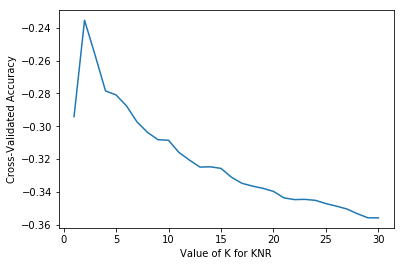

In [135]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNR')
plt.ylabel('Cross-Validated Accuracy')

In [136]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [137]:
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(x_train,y_train)
knr.score(x_test, y_test)

0.7248011989436487

In [138]:
logreg = LogisticRegression()
# scores = cross_val_score(logreg, x, y, cv=10, scoring='neg_mean_squared_error').mean()
# print("\t", -1*scores)

ValueError: Unknown label type: 'continuous'

In [139]:
lm = LinearRegression()
scores = cross_val_score(lm, x, y, cv=10, scoring='neg_mean_squared_error').mean()
print("\t", -1*scores)

	 0.09490403601506459


In [140]:
# linear regression
lm = LinearRegression()
lm.fit(x_train, y_train)
y_pred = lm.predict(x_test)
lm.score(x_test, y_test)
metrics.mean_squared_error(y_test, y_pred)**0.5

0.2937946973611242

In [141]:
# bayesian ridge regression 
lm_br = linear_model.BayesianRidge()
lm_br.fit(x_train,y_train)
y_pred = lm_br.predict(x_test)
lm_br.score(x_test, y_test)

0.807205139378568

In [142]:
# stochastic gradient descent regressor
lm_sgd = linear_model.SGDRegressor(max_iter=1000)
lm_sgd.fit(x_train,y_train)
y_pred = lm_sgd.predict(x_test)
lm_sgd.score(x_test, y_test)

-2.7827406258385834e+30

In [143]:
# support vector machine regressor
from sklearn import svm
clf = svm.SVR()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
clf.score(x_test, y_test)

-0.003442095866776907

In [144]:
# ridge regression
lm_rd = linear_model.Ridge()
lm_rd.fit(x_train,y_train)
y_pred = lm_rd.predict(x_test)
lm_rd.score(x_test, y_test)

0.811268211381817

In [145]:
# decision tree regressor
from sklearn import tree
clf = tree.DecisionTreeRegressor()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
clf.score(x_test, y_test)

0.6651003735599663

In [146]:
# simple linear model
x_simp = df[['year', 'week', 'tamiflu', 'median_t', 'absolute_humidity']]
y_simp = df[['cases']]
x_train_simp, x_test_simp, y_train_simp, y_test_simp = train_test_split(x_simp, y_simp, random_state=1)
lm_simp = LinearRegression()
lm_simp.fit(x_train_simp, y_train_simp)
lm_simp.score(x_test_simp, y_test_simp)
# metrics.mean_squared_error(y_test_simp, y_pred_simp)**0.5

0.8218443372525094

In [147]:
# ridge regression
lm_rd2 = linear_model.Ridge()
lm_rd2.fit(x_train_simp,y_train_simp)
y_pred_simp = lm_rd2.predict(x_test_simp)
lm_rd2.score(x_test_simp, y_test_simp)
metrics.mean_squared_error(y_test_simp, y_pred_simp)

0.08148019042599691

In [148]:
# find optimal k value
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knr = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knr, x_simp, y_simp, cv=10, scoring='neg_mean_squared_error')
    k_scores.append(scores.mean())
print("\t", -1*max(k_scores))

	 0.19436179657667146


Text(0,0.5,'Cross-Validated Accuracy')

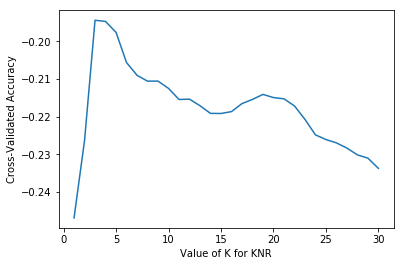

In [155]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNR')
plt.ylabel('Cross-Validated Accuracy')

In [149]:
# create seasons variable
seasons = np.array([])
for index, row in df.iterrows():
   if row["week"] > 39:
       seasons = np.append(seasons, row["year"])
   else:
       seasons = np.append(seasons, row["year"] - 1)
df["season"] = seasons


In [150]:
# compile x_all and y_all
x_all = df[['season',
 'week',
 'cough_medicine',
 'flu_clinic',
 'flu_shot',
 'flu_vaccine',
 'flu',
 'influenza',
 'oseltamivir',
 'relenza',
 'tamiflu',
 'zanamivir',
 'flu_symptoms',
 'median_t',
 'total_prcp',
 'vac_effectiveness',
 'absolute_humidity']]
y_all = df[['cases']]
x_all.head()
y_all.head()

,cases
0,0.000000
1,0.009975
2,0.010011
3,0.020020
4,0.000000


In [151]:
# all variables linear model using season 
x_train_all, x_test_all, y_train_all, y_test_all = train_test_split(x_all, y_all, random_state=1)
lm_all = LinearRegression()
lm_all.fit(x_train_all, y_train_all)
lm_all.score(x_test_all, y_test_all)
# y_pred_all = lm_all.predict(x_test_all)
# metrics.mean_squared_error(y_test_all, y_pred_all)**0.5

0.8057178572771361

In [152]:
# with 2017 as test season
x_train_all = x_all[x_all['season'] < 2017].drop(['season'], axis=1)
x_train_all.tail()
x_test_all = x_all[x_all['season'] == 2017].drop(['season'], axis=1)
# x_test_all.head()
y_all = df[['season', 'cases']]
y_train_all = y_all[y_all['season'] < 2017].drop(['season'], axis=1)
# y_train_all.tail()
y_test_all = y_all[y_all['season'] == 2017].drop(['season'], axis=1)


In [153]:
# model with 2017 as test season
lm_all = LinearRegression()
lm_all.fit(x_train_all, y_train_all)
lm_all.score(x_test_all, y_test_all)
y_pred_all = lm_all.predict(x_test_all)

y_pred_all[y_pred_all < 0] = 0
metrics.mean_squared_error(y_test_all, y_pred_all)**0.5

0.2503937336258942